In [ ]:
# Tarea 1 - Diplomado de Aprendizaje Automático
# Jose Elías Montalvo y Rosssana Ramos

In [148]:
#Cargando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Leyendo los datos
data = pd.read_csv('user_loggedin_teacher.csv')
data

,Unnamed: 0,id,department,timecreated,rol,userid
0,121884,552,Departamento De Español y Literatura,1709549942,editingteacher,fa5d171c9280388b26a2569e9fccc7683ab3ec70b685b3...
1,121885,319,Departamento De Informática Educativa,1709551598,editingteacher,6620b5d17f18eed1eb4d2d1cf4d7fe20c1dc49f0d6605d...
2,121886,568,Departamento de Salud Pública,1709551692,editingteacher,eca7bf3a91ac9f5b18f1bc05d3c44326c4a70f9d746a1b...
3,121887,29,NaN,1709555966,editingteacher,d6fccd5d02351b1c921506167eb6bd49e8203158ddd342...
4,121888,366,Dpto De Ciencias Naturales,1709556334,editingteacher,9a94168caabfa08ab2e00e84ccae436d30338af9eedc28...
...,...,...,...,...,...,...
18944,459318,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713366104,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18945,459321,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713367124,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18946,459700,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713827512,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18947,459956,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1714218380,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...


In [5]:
# Contar cuántos NA's hay en cada columna
data.isna().sum()

Unnamed: 0        0
id                0
department     1103
timecreated       0
rol               0
userid            0
dtype: int64

In [107]:
#Eliminar NA's
datos = data.dropna()
datos
datos.isna().sum()

Unnamed: 0     0
id             0
department     0
timecreated    0
rol            0
userid         0
dtype: int64

In [109]:
#Verificando si hay duplicados
datos.duplicated().sum()

np.int64(0)

In [110]:
#Datos de la columna department
datos['department'].unique()

array(['Departamento De Español y Literatura',
       'Departamento De Informática Educativa',
       'Departamento de Salud Pública', 'Dpto De Ciencias Naturales',
       'Departamento De Ciencias Jurídicas',
       'Departamento De Ingeniería Industrial',
       'Dpto De Ing Agronómica Y Desarroll Rural',
       'Dpto Ciencias Administrativas', 'Departamento De Enfermería',
       'Departamento De Idiomas Extranjeros', 'Departamento De Química',
       'Dpto De Ing De Sistemas Y Telecomunicaci',
       'Departamento De Matemáticas Y Estadístic',
       'Departamento de Regencía Y Farmacia', 'Departamento De Biología',
       'Departamento de Psicopedagogía', 'Dpto De Ingeniería Ambiental',
       'Dpto De Cultura Física, Recreac Y Deport',
       'Departamento De Ciencias Pecuarías',
       'Departamento De Geografía Y Medio Ambien',
       'Departamento De Bacteriología',
       'Departamento de Física y Electrónica', ' Ingeniería Mecánica',
       'ENFERMERÍA', 'Departamento De Cie

In [111]:
#Cambiando todas las letras a mayúsculas
datos.loc[:, 'department'] = datos['department'].str.upper()
datos['department'].unique()

array(['DEPARTAMENTO DE ESPAÑOL Y LITERATURA',
       'DEPARTAMENTO DE INFORMÁTICA EDUCATIVA',
       'DEPARTAMENTO DE SALUD PÚBLICA', 'DPTO DE CIENCIAS NATURALES',
       'DEPARTAMENTO DE CIENCIAS JURÍDICAS',
       'DEPARTAMENTO DE INGENIERÍA INDUSTRIAL',
       'DPTO DE ING AGRONÓMICA Y DESARROLL RURAL',
       'DPTO CIENCIAS ADMINISTRATIVAS', 'DEPARTAMENTO DE ENFERMERÍA',
       'DEPARTAMENTO DE IDIOMAS EXTRANJEROS', 'DEPARTAMENTO DE QUÍMICA',
       'DPTO DE ING DE SISTEMAS Y TELECOMUNICACI',
       'DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTIC',
       'DEPARTAMENTO DE REGENCÍA Y FARMACIA', 'DEPARTAMENTO DE BIOLOGÍA',
       'DEPARTAMENTO DE PSICOPEDAGOGÍA', 'DPTO DE INGENIERÍA AMBIENTAL',
       'DPTO DE CULTURA FÍSICA, RECREAC Y DEPORT',
       'DEPARTAMENTO DE CIENCIAS PECUARÍAS',
       'DEPARTAMENTO DE GEOGRAFÍA Y MEDIO AMBIEN',
       'DEPARTAMENTO DE BACTERIOLOGÍA',
       'DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA', ' INGENIERÍA MECÁNICA',
       'ENFERMERÍA', 'DEPARTAMENTO DE CIE

In [112]:
# Lista con los nombres de departamentos a cambiar
prog = [
['LIC EN INFORMÁTICA', 'INFORMÁTICA', 'INFORMATICA', 'DEPARTAMENTO DE INFORMTICA EDUCATIVA', 'DEPARTAMENTO DE INFORMÁTICA EDUCATIVA'],
['DEPARTAMENTO DE SALUD PÚBLICA', 'DEPARTAMENTO DE SALUD PBLICA', 'ADMINISTRACIÓN EN SALUD', 'DEPARTAMENTO DE SALUD PUBLICA D P', 'DPTO CIENCIAS ADMINISTRATIVAS'],
['DPTO DE CIENCIAS NATURALES'],
['DEPARTAMENTO DE CIENCIAS JURÍDICAS', 'CIENCIAS JURÍDICAS', 'DEPARTAMENTO DE CIENCIAS JURDICAS'],
['DPTO DE ING AGRONÓMICA Y DESARROLL RURAL', 'DECANATURA FACULTAD DE CIENCIAS AGRICOLAS D P'],
['DEPARTAMENTO DE ENFERMERÍA', 'ENFERMERÍA', 'ENFERMERÍA ', 'DEPARTAMENTO DE ENFERMERIA D P'],
['DEPARTAMENTO DE IDIOMAS EXTRANJEROS', 'DEPARTAMENTO DE IDIOMAS EXTRANJEROS D P'],
['DPTO DE ING DE SISTEMAS Y TELECOMUNICACI'],
['DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTIC', 'MATEMATICA Y ESTADISTICA'],
['REGENCIA DE FARMACIA', 'DEPARTAMENTO DE REGENCÍA Y FARMACIA'],
['DEPARTAMENTO DE BIOLOGÍA', 'BIOLOGIA'],
['DEPARTAMENTO DE PSICOPEDAGOGÍA', 'DEPARTAMENTO DE PSICOPEDAGOGA', 'PSICOPEDAGOGIA'],
['DPTO DE INGENIERÍA AMBIENTAL', 'INGENIERÍA AMBIENTAL ', 'INGENIERÍA AMBIENTAL', 'DEPARTAMENTO DE INGENIERIA AMBIENTAL D P'],
['DPTO DE CULTURA FSICA, RECREAC Y DEPORT', 'DPTO DE CULTURA FÍSICA, RECREAC Y DEPORT'],
['DEPARTAMENTO DE GEOGRAFÍA Y MEDIO AMBIEN', 'GEOGRAFÍA', 'DEPARTAMENTO DE GEOGRAFA Y MEDIO AMBIEN'],
[ 'DEPARTAMENTO DE BACTERIOLOGÍA',   'DEPARTAMENTO DE BACTERIOLOGIA D P'],
['DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA', 'DEPARTAMENTO DE FISICA Y ELECTRONICA D P', 'FSICA'],
[' INGENIERÍA MECÁNICA', 'DEPARTAMENTO DE INGENIERÍA MECÁNICA'],
[ 'DEPARTAMENTO DE CIENCIAS PECUARÍAS', 'DEPARTAMENTO DE CIENCIAS ACUÍCOLAS', 'DEPARTAMENTO DE CIENCIAS ACUICOLAS D P']
]

#Lista de nombres correctos
nombres = [
       'DEPARTAMENTO DE INFORMÁTICA',
       'DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD',
       'DEPARTAMENTO DE CIENCIAS NATURALES',
       'DEPARTAMENTO DE CIENCIAS JURÍDICAS',
       'DEPARTAMENTO DE INGENIERÍA AGRONÓMICA Y DESARROLLO RURAL',
       'DEPARTAMENTO DE ENFERMERÍA',
       'DEPARTAMENTO DE IDIOMAS EXTRANJEROS', 
       'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y TELECOMUNICACIONES',
       'DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTICA',
       'DEPARTAMENTO DE REGENCIA Y FARMACIA', 
       'DEPARTAMENTO DE BIOLOGÍA',
       'DEPARTAMENTO DE PSICOPEDAGOGÍA', 
       'DEPARTAMENTO DE INGENIERÍA AMBIENTAL',
       'DEPARTAMENTO DE CULTURA FÍSICA, RECREAC Y DEPORT',
       'DEPARTAMENTO DE GEOGRAFÍA Y MEDIO AMBIENTE',
       'DEPARTAMENTO DE BACTERIOLOGÍA',
       'DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA', 
       'DEPARTAMENTO DE INGENIERÍA MECÁNICA',
       'DEPARTAMENTO DE CIENCIAS ACUÍCOLAS', ]
#Ciclo for que recorre ambas listas y las reemplaza en la columna
for i in range(len(prog)):
    datos.loc[:, 'department'] = datos['department'].replace(prog[i], np.repeat(nombres[i], len(prog[i])))
datos['department'].unique()

array(['DEPARTAMENTO DE ESPAÑOL Y LITERATURA',
       np.str_('DEPARTAMENTO DE INFORMÁTICA'),
       np.str_('DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD'),
       np.str_('DEPARTAMENTO DE CIENCIAS NATURALES'),
       np.str_('DEPARTAMENTO DE CIENCIAS JURÍDICAS'),
       'DEPARTAMENTO DE INGENIERÍA INDUSTRIAL',
       np.str_('DEPARTAMENTO DE INGENIERÍA AGRONÓMICA Y DESARROLLO RURAL'),
       np.str_('DEPARTAMENTO DE ENFERMERÍA'),
       np.str_('DEPARTAMENTO DE IDIOMAS EXTRANJEROS'),
       'DEPARTAMENTO DE QUÍMICA',
       np.str_('DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y TELECOMUNICACIONES'),
       np.str_('DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTICA'),
       np.str_('DEPARTAMENTO DE REGENCIA Y FARMACIA'),
       np.str_('DEPARTAMENTO DE BIOLOGÍA'),
       np.str_('DEPARTAMENTO DE PSICOPEDAGOGÍA'),
       np.str_('DEPARTAMENTO DE INGENIERÍA AMBIENTAL'),
       np.str_('DEPARTAMENTO DE CULTURA FÍSICA, RECREAC Y DEPORT'),
       np.str_('DEPARTAMENTO DE CIENCIAS ACUÍCOLAS'),
       np.str

In [124]:
#Eliminando filas que contiene 'INGENIERÍA' como departamento ya que no se puede saber 
#con claridad a qué departamento de ingeniería pertenece
datos = datos.drop(datos[datos['department'] == 'INGENIERÍA '].index)
datos['department'].unique()

array(['DEPARTAMENTO DE ESPAÑOL Y LITERATURA',
       np.str_('DEPARTAMENTO DE INFORMÁTICA'),
       np.str_('DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD'),
       np.str_('DEPARTAMENTO DE CIENCIAS NATURALES'),
       np.str_('DEPARTAMENTO DE CIENCIAS JURÍDICAS'),
       'DEPARTAMENTO DE INGENIERÍA INDUSTRIAL',
       np.str_('DEPARTAMENTO DE INGENIERÍA AGRONÓMICA Y DESARROLLO RURAL'),
       np.str_('DEPARTAMENTO DE ENFERMERÍA'),
       np.str_('DEPARTAMENTO DE IDIOMAS EXTRANJEROS'),
       'DEPARTAMENTO DE QUÍMICA',
       np.str_('DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y TELECOMUNICACIONES'),
       np.str_('DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTICA'),
       np.str_('DEPARTAMENTO DE REGENCIA Y FARMACIA'),
       np.str_('DEPARTAMENTO DE BIOLOGÍA'),
       np.str_('DEPARTAMENTO DE PSICOPEDAGOGÍA'),
       np.str_('DEPARTAMENTO DE INGENIERÍA AMBIENTAL'),
       np.str_('DEPARTAMENTO DE CULTURA FÍSICA, RECREAC Y DEPORT'),
       np.str_('DEPARTAMENTO DE CIENCIAS ACUÍCOLAS'),
       np.str

In [125]:
datos

,Unnamed: 0,id,department,timecreated,rol,userid
0,121884,552,DEPARTAMENTO DE ESPAÑOL Y LITERATURA,1709549942,editingteacher,fa5d171c9280388b26a2569e9fccc7683ab3ec70b685b3...
1,121885,319,DEPARTAMENTO DE INFORMÁTICA,1709551598,editingteacher,6620b5d17f18eed1eb4d2d1cf4d7fe20c1dc49f0d6605d...
2,121886,568,DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD,1709551692,editingteacher,eca7bf3a91ac9f5b18f1bc05d3c44326c4a70f9d746a1b...
4,121888,366,DEPARTAMENTO DE CIENCIAS NATURALES,1709556334,editingteacher,9a94168caabfa08ab2e00e84ccae436d30338af9eedc28...
5,121889,706,DEPARTAMENTO DE CIENCIAS JURÍDICAS,1709557018,editingteacher,0ca8db7afaab56d714c075335a79f217e4d23522967ac1...
...,...,...,...,...,...,...
18944,459318,16465,DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA,1713366104,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18945,459321,16465,DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA,1713367124,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18946,459700,16465,DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA,1713827512,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18947,459956,16465,DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA,1714218380,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...


In [151]:
# 2 Punto: Show total login by department and bar graph
login_totals = datos.groupby(["department"])['id'].count().reset_index(name='total_inicios_sesion')
login_totals

,department,total_inicios_sesion
0,DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD,5006
1,DEPARTAMENTO DE ARTES,16
2,DEPARTAMENTO DE BACTERIOLOGÍA,668
3,DEPARTAMENTO DE BIOLOGÍA,725
4,DEPARTAMENTO DE CIENCIAS ACUÍCOLAS,327
5,DEPARTAMENTO DE CIENCIAS JURÍDICAS,326
6,DEPARTAMENTO DE CIENCIAS NATURALES,211
7,DEPARTAMENTO DE CIENCIAS SOCIALES,101
8,"DEPARTAMENTO DE CULTURA FÍSICA, RECREAC Y DEPORT",159
9,DEPARTAMENTO DE ENFERMERÍA,335


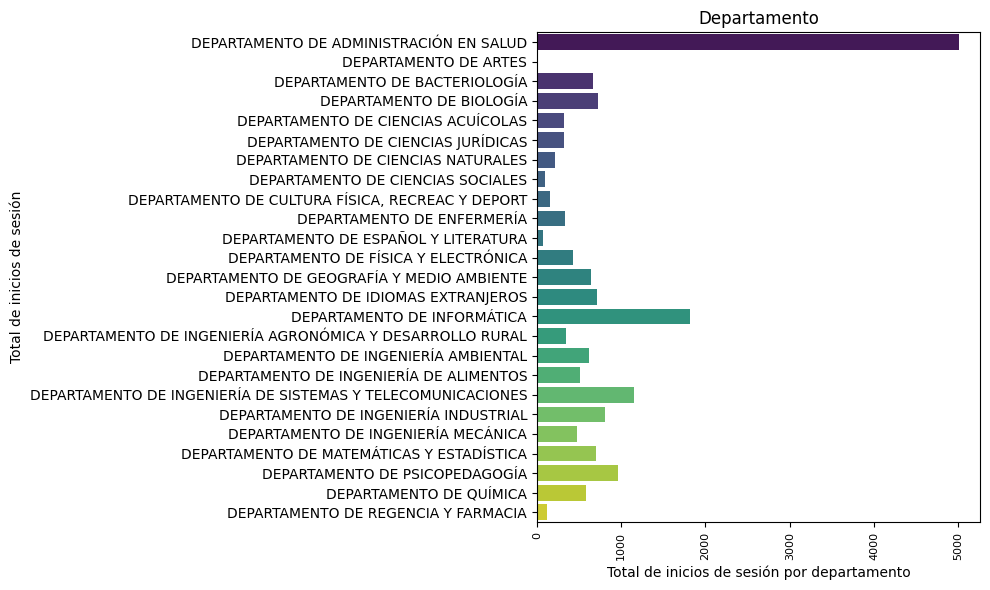

In [159]:
# Graficar 
plt.figure(figsize=(10, 6))
sns.barplot(x='total_inicios_sesion', y='department', data = login_totals,  hue='department', palette='viridis')
plt.title('Departamento')
plt.xlabel('Total de inicios de sesión por departamento')
plt.ylabel('Total de inicios de sesión')
plt.xticks(rotation=90, ha='center', fontsize=8)  # Rotación vertical y centrado para evitar desplazamientos
plt.tight_layout()

In [286]:
# 3 Punto: Display the total number of logins per teacher in a specific program
programa_especifico = 'DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTICA'
df_programa = datos[datos['department'] == programa_especifico]

# Contar el total de inicios de sesión por profesor en el programa específico
login_totals_profesor = df_programa.groupby('id')['id'].count().reset_index(name='total_inicios_sesion')

print(login_totals_profesor)

       id  total_inicios_sesion
0     197                     4
1     198                     7
2     218                    30
3     354                     6
4     417                    22
5     450                     9
6     451                    43
7     480                    14
8     503                     2
9     514                     7
10    521                    73
11    551                    24
12    572                     6
13    573                    50
14    574                    65
15    575                     1
16    576                     4
17    579                    68
18    583                    67
19    584                    62
20    594                   111
21  16357                     4
22  17858                    23


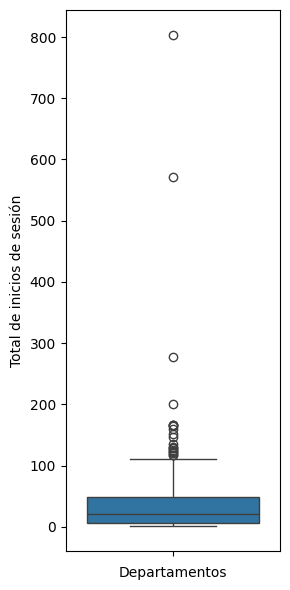

In [277]:
# 5 Punto: Login boxplot graph by department
plt.figure(figsize=(3, 6))
sns.boxplot(login_totals['total_inicios_sesion'])
plt.xlabel('Departamentos')
plt.ylabel('Total de inicios de sesión')
plt.tight_layout()

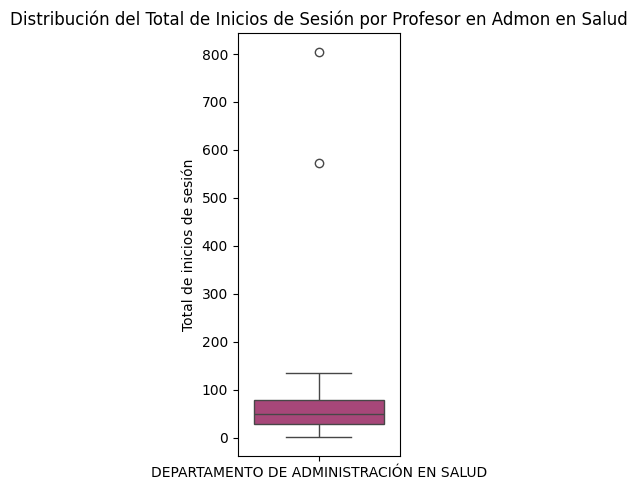

In [284]:
# Agrupar los datos por departamento y profesor y contar el total de inicios de sesión
login_totals = datos.groupby(['department', 'id']).size().reset_index(name='total_inicios_sesion')

# Crear el gráfico de cajas, usando el programa como eje x
# DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD por aparte porque aplasta las otras gráficas
plt.figure(figsize=(3, 5))
sns.boxplot(x='department', y='total_inicios_sesion', 
            data=login_totals[login_totals['department']=='DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD'], hue='department', palette="magma", legend=False)

# Etiquetas y diseño
plt.title('Distribución del Total de Inicios de Sesión por Profesor en Admon en Salud')
plt.ylabel('Total de inicios de sesión')
plt.xlabel('')
plt.tight_layout()
plt.show()

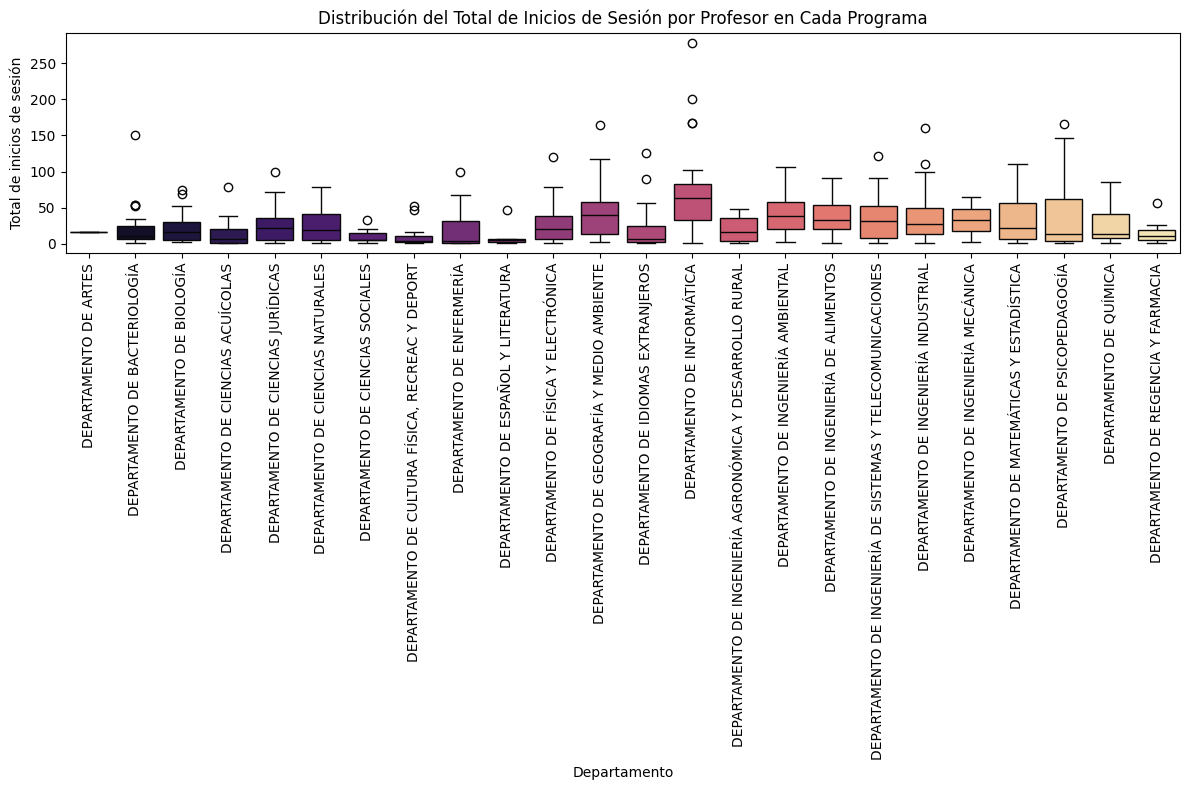

In [285]:
# Agrupar los datos por departamento y profesor y contar el total de inicios de sesión
login_totals = datos.groupby(['department', 'id']).size().reset_index(name='total_inicios_sesion')

# Crear el gráfico de cajas, usando el programa como eje x
# Quitamos DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD porque aplasta las demás gráficas
plt.figure(figsize=(12, 8))
sns.boxplot(x='department', y='total_inicios_sesion', 
            data=login_totals[login_totals['department']!='DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD'], hue='department', palette="magma", legend=False)

# Etiquetas y diseño
plt.title('Distribución del Total de Inicios de Sesión por Profesor en Cada Programa')
plt.xlabel('Departamento')
plt.ylabel('Total de inicios de sesión')
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotación para las etiquetas de los departamentos

plt.tight_layout()
plt.show()

In [273]:
# 6 Punto:Login average by department
#Medias por departamento
media_por_departamento = login_totals.groupby('department')['total_inicios_sesion'].mean().reset_index()
media_por_departamento.rename(columns={'total_inicios_sesion': 'media_conexiones'}, inplace=True)
media_por_departamento

                                           department  media_conexiones
0             DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD         72.550725
1                               DEPARTAMENTO DE ARTES         16.000000
2                       DEPARTAMENTO DE BACTERIOLOGÍA         20.242424
3                            DEPARTAMENTO DE BIOLOGÍA         21.969697
4                  DEPARTAMENTO DE CIENCIAS ACUÍCOLAS         14.863636
5                  DEPARTAMENTO DE CIENCIAS JURÍDICAS         29.636364
6                  DEPARTAMENTO DE CIENCIAS NATURALES         26.375000
7                   DEPARTAMENTO DE CIENCIAS SOCIALES         10.100000
8    DEPARTAMENTO DE CULTURA FÍSICA, RECREAC Y DEPORT         11.357143
9                          DEPARTAMENTO DE ENFERMERÍA         18.611111
10               DEPARTAMENTO DE ESPAÑOL Y LITERATURA         10.000000
11               DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA         30.928571
12         DEPARTAMENTO DE GEOGRAFÍA Y MEDIO AMBIENTE         49

In [276]:
#7mo Punto: Quartiles of teachers by department
#Cuantiles por departamento
quartiles_por_departamento = login_totals.groupby('department')['total_inicios_sesion'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles_por_departamento.columns = ['Q1', 'Q2', 'Q3']
quartiles_por_departamento

,Q1,Q2,Q3
department,,,
DEPARTAMENTO DE ADMINISTRACIÓN EN SALUD,29.00,49.0,79.00
DEPARTAMENTO DE ARTES,16.00,16.0,16.00
DEPARTAMENTO DE BACTERIOLOGÍA,6.00,11.0,24.00
DEPARTAMENTO DE BIOLOGÍA,5.00,17.0,30.00
DEPARTAMENTO DE CIENCIAS ACUÍCOLAS,1.25,7.0,20.75
DEPARTAMENTO DE CIENCIAS JURÍDICAS,5.00,22.0,35.50
DEPARTAMENTO DE CIENCIAS NATURALES,4.75,18.5,41.75
DEPARTAMENTO DE CIENCIAS SOCIALES,5.00,5.5,14.50
"DEPARTAMENTO DE CULTURA FÍSICA, RECREAC Y DEPORT",2.00,3.5,10.50
